In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
from scipy import stats
import requests
import json
import matplotlib.pyplot as plt
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cli_df = pd.read_csv('cli_data.csv', index_col='survey_dateBGD', parse_dates=['survey_dateBGD'])
cli_df = cli_df.drop(columns=[col for col in cli_df.columns if col.startswith('iso')])
cli_df = cli_df.drop(columns=[col for col in cli_df.columns if col.startswith('survey')])
cli_df = cli_df.apply(lambda x: x.fillna(x.mean()),axis=0)
cli_df.index = cli_df.index.rename('survey_date')
cli_df.head()

,percent_cli_BGD,percent_cli_BRA,percent_cli_FRA,percent_cli_DEU,percent_cli_HKG,percent_cli_IND,percent_cli_IDN,percent_cli_ITA,percent_cli_JPN,percent_cli_MEX,percent_cli_NGA,percent_cli_PAK,percent_cli_RUS,percent_cli_ESP,percent_cli_GBR,percent_cli_USA
survey_date,,,,,,,,,,,,,,,,
2020-04-23,0.014057,0.016760,0.006725,0.003384,0.006668,0.010592,0.025362,0.001330,0.007746,0.008138,0.052156,0.014823,0.019895,0.006994,0.009821,0.006521
2020-04-24,0.013947,0.021926,0.010680,0.002660,0.000000,0.003820,0.016710,0.001967,0.005306,0.006339,0.039334,0.015255,0.012855,0.012306,0.009369,0.005833
2020-04-25,0.058605,0.018806,0.011962,0.003445,0.002224,0.009395,0.014225,0.003234,0.002093,0.010872,0.033329,0.012219,0.014640,0.006802,0.008019,0.006359
2020-04-26,0.015633,0.022684,0.004981,0.003906,0.003776,0.007222,0.012975,0.001931,0.016870,0.008330,0.036333,0.020205,0.014845,0.009856,0.010413,0.005550
2020-04-27,0.004173,0.020321,0.008015,0.002599,0.007746,0.005370,0.015602,0.004290,0.005067,0.011629,0.030286,0.016538,0.023884,0.007267,0.009805,0.005165


In [3]:
mask_df = pd.read_csv('mask_data.csv', index_col='survey_dateBGD', parse_dates=['survey_dateBGD'])
mask_df = mask_df.drop(columns=[col for col in mask_df.columns if col.startswith('iso')])
mask_df = mask_df.drop(columns=[col for col in mask_df.columns if col.startswith('survey')])
mask_df = mask_df.apply(lambda x: x.fillna(x.mean()),axis=0)
mask_df.index = mask_df.index.rename('survey_date')
mask_df.head()

,percent_mc_BGD,percent_mc_BRA,percent_mc_FRA,percent_mc_DEU,percent_mc_HKG,percent_mc_IND,percent_mc_IDN,percent_mc_ITA,percent_mc_JPN,percent_mc_MEX,percent_mc_NGA,percent_mc_PAK,percent_mc_RUS,percent_mc_ESP,percent_mc_GBR
survey_date,,,,,,,,,,,,,,,
2020-04-23,0.649164,0.519386,0.345529,0.253500,0.832087,0.641155,0.757832,0.785390,0.887617,0.589440,0.311477,0.655013,0.565471,0.607700,0.107097
2020-04-24,0.675812,0.571445,0.335905,0.322067,0.907739,0.671981,0.762985,0.780743,0.881380,0.619799,0.348107,0.664794,0.475198,0.626483,0.112999
2020-04-25,0.642148,0.596099,0.359986,0.338988,0.864140,0.662054,0.761412,0.773678,0.894091,0.641941,0.312918,0.640040,0.505276,0.629869,0.114817
2020-04-26,0.658427,0.628244,0.350649,0.369347,0.884021,0.679721,0.764758,0.772313,0.905230,0.674484,0.294879,0.617538,0.514084,0.634150,0.109678
2020-04-27,0.678081,0.625843,0.384629,0.439633,0.916908,0.703356,0.769952,0.783545,0.867445,0.662691,0.362926,0.638015,0.535498,0.647864,0.112297


In [4]:
df = cli_df.join(mask_df)
df.head()

,percent_cli_BGD,percent_cli_BRA,percent_cli_FRA,percent_cli_DEU,percent_cli_HKG,percent_cli_IND,percent_cli_IDN,percent_cli_ITA,percent_cli_JPN,percent_cli_MEX,...,percent_mc_IND,percent_mc_IDN,percent_mc_ITA,percent_mc_JPN,percent_mc_MEX,percent_mc_NGA,percent_mc_PAK,percent_mc_RUS,percent_mc_ESP,percent_mc_GBR
survey_date,,,,,,,,,,,,,,,,,,,,,
2020-04-23,0.014057,0.016760,0.006725,0.003384,0.006668,0.010592,0.025362,0.001330,0.007746,0.008138,...,0.641155,0.757832,0.785390,0.887617,0.589440,0.311477,0.655013,0.565471,0.607700,0.107097
2020-04-24,0.013947,0.021926,0.010680,0.002660,0.000000,0.003820,0.016710,0.001967,0.005306,0.006339,...,0.671981,0.762985,0.780743,0.881380,0.619799,0.348107,0.664794,0.475198,0.626483,0.112999
2020-04-25,0.058605,0.018806,0.011962,0.003445,0.002224,0.009395,0.014225,0.003234,0.002093,0.010872,...,0.662054,0.761412,0.773678,0.894091,0.641941,0.312918,0.640040,0.505276,0.629869,0.114817
2020-04-26,0.015633,0.022684,0.004981,0.003906,0.003776,0.007222,0.012975,0.001931,0.016870,0.008330,...,0.679721,0.764758,0.772313,0.905230,0.674484,0.294879,0.617538,0.514084,0.634150,0.109678
2020-04-27,0.004173,0.020321,0.008015,0.002599,0.007746,0.005370,0.015602,0.004290,0.005067,0.011629,...,0.703356,0.769952,0.783545,0.867445,0.662691,0.362926,0.638015,0.535498,0.647864,0.112297


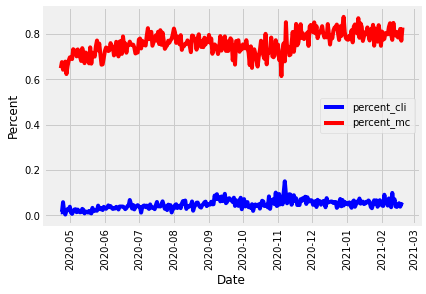

In [11]:
plt.plot(df.index, df['percent_cli_BGD'], color='blue')
plt.plot(df.index, df['percent_mc_BGD'], color='Red')
plt.legend(('percent_cli', 'percent_mc'))
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

In [ ]:
sns.lineplot(x=cli_df.index, y='percent_cli_BGD', data=cli_df)
plt.xticks(rotation=90)
plt.show()